In [1]:
!python3 -m pip install numpy matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
def r(i,w,n,nc,a,t,c,co):
  alpha_1 = 0.00140647805322
  alpha_2 = 2.1474836474 * pow(10, 9)
  alpha_3 = 1.04191002084
  alpha_4 = 3.33741248841
  alpha_5 = 0.0341831178375
  alpha_6 = 5.58882151259
  beta = -22.828716926

  delta = 0.1
  ac = 18
  tc = 0.75

  return alpha_1 * (delta * i - c - co) + alpha_2 * (w - 1) - alpha_3 * nc + alpha_4 * (n - nc) + alpha_5 * (a - ac) + alpha_6 * (t - tc) + beta

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
us_data = {
  "i_mean": 74580,
  "n_mean": 2.51,
  "n_c_mean": 0.08310634996,
  "a_mean": 234.30147,
  "t_mean": 5.3 / 2,
  "c_o_mean": 425,
  "c_cost": 1149,
}

india_data = {
  "i_mean": 382800,
  "n_mean": 4.44,
  "n_c_mean": 0.1455026455,
  "a_mean": 47,
  "t_mean": 2.53 / 2,
  "c_o_mean": 27508,
  "c_cost": 21360,
}

aus_data = {
  "i_mean": 93800,
  "n_mean": 2.4,
  "n_c_mean": 0.1163151441,
  "a_mean": 248,
  "t_mean": 4.46 / 2,
  "c_o_mean": 3028,
  "c_cost": 1750,
}

In [5]:
num_households = [131434000, 302400000, 10874835]

In [6]:
num_samples = 100_000

In [7]:
def generate_data(data):
  income_data = np.random.lognormal(mean=np.log(data["i_mean"]), sigma=0.4, size=num_samples)
  household_size = np.random.poisson(data["n_mean"], num_samples)
  children_size = np.random.poisson(data["n_c_mean"], num_samples)
  floor_size = np.random.poisson(data["a_mean"], num_samples)
  time_dist = np.random.poisson(data["t_mean"], num_samples)
  c_o_dist = np.random.poisson(data["c_o_mean"], num_samples)
  return [income_data, household_size, children_size, floor_size, time_dist, c_o_dist]

In [8]:
def simulate(data, household_number):
    results = []
    current_r_over_zero = 0
    distributions = generate_data(data)

    for sample in range(num_samples):
        current_r = r(
                distributions[0][sample],
                1,
                distributions[1][sample],
                distributions[2][sample],
                distributions[3][sample],
                distributions[4][sample],
                data["c_cost"],
                distributions[5][sample],
            )
        if current_r > 0:
            current_r_over_zero += 1
        
        results.append(current_r)

    print(current_r_over_zero)
    print(current_r_over_zero * household_number / num_samples)
    print(current_r_over_zero * 100 / num_samples, "%")

    plt.hist(results, bins=50)
    plt.show()

USA
85749
112703340.66
85.749 %


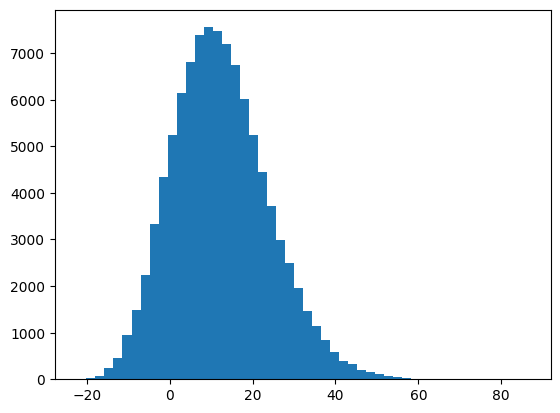

INDIA
23352
70616448.0
23.352 %


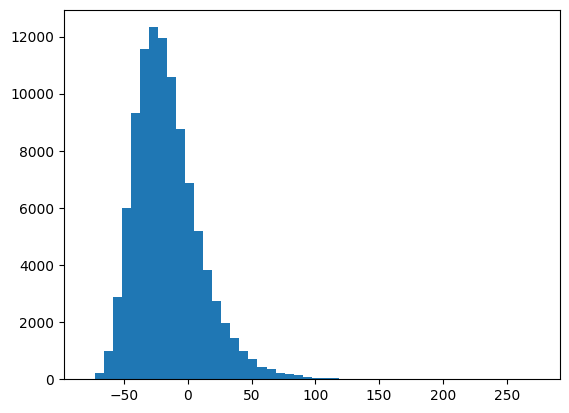

AUSTRALIA
75713
8233663.82355
75.713 %


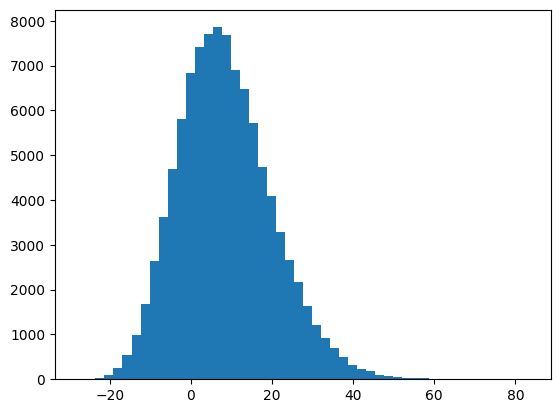

In [9]:
print("USA")
simulate(us_data, num_households[0])
print("INDIA")
simulate(india_data, num_households[1])
print("AUSTRALIA")
simulate(aus_data, num_households[2])